# Preliminary Analysis

What does the data look like?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

votes.csv downloaded from [Eurovision Dataset GitHub](https://github.com/Spijkervet/eurovision-dataset/releases/tag/2023)

In [3]:
filepath = "../data/votes.csv"
df = pd.read_csv(filepath)
df.head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN


## Basic Info

In [4]:
df.describe()

,year,total_points,tele_points,jury_points
count,51354.000000,51354.000000,11741.000000,11715.000000
mean,2002.974199,3.121626,2.628056,2.628937
std,15.987289,4.401337,3.659772,3.660069
min,1957.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.000000,0.000000,0.000000
75%,2015.000000,6.000000,5.000000,5.000000
max,2023.000000,24.000000,12.000000,12.000000


~51000 data points from 1957 to 2023 with country and vote numbers. ~11700 split into jury and television points. 

In [5]:
votes_df = pd.read_csv("../data/vote_distances.csv")
votes_df

,Unnamed: 0,year,round,from_country,to_country,total_points,tele_points,jury_points,from_capital,to_capital,distance
0,0,1957,final,at,nl,6,NaN,NaN,Vienna,Amsterdam,935.926496
1,1,1957,final,at,fr,0,NaN,NaN,Vienna,Paris,1036.040752
2,2,1957,final,at,dk,0,NaN,NaN,Vienna,København,871.969165
3,3,1957,final,at,lu,3,NaN,NaN,Vienna,Luxembourg,765.856559
4,4,1957,final,at,de,0,NaN,NaN,Vienna,Berlin,524.812724
...,...,...,...,...,...,...,...,...,...,...,...
51349,51349,2023,final,wld,al,6,6.0,NaN,NaN,Tirana,NaN
51350,51350,2023,final,wld,pt,0,0.0,NaN,NaN,Lisbon,NaN
51351,51351,2023,final,wld,rs,0,0.0,NaN,NaN,Belgrade,NaN
51352,51352,2023,final,wld,gb,0,0.0,NaN,NaN,London,NaN


Text(0.5, 1.0, 'Score vs. Distance')

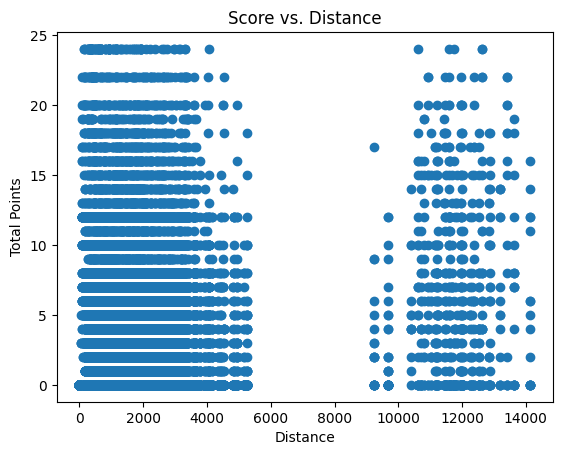

In [6]:
plt.scatter(votes_df["distance"], votes_df["total_points"])
plt.xlabel("Distance")
plt.ylabel("Total Points")
plt.title("Score vs. Distance")


(array([23143., 21207.,  5328.,   454.,     0.,     0.,    55.,   189.,
          385.,    99.]),
 array([    0.        ,  1414.1703915 ,  2828.34078301,  4242.51117451,
         5656.68156602,  7070.85195752,  8485.02234902,  9899.19274053,
        11313.36313203, 12727.53352354, 14141.70391504]),
 <BarContainer object of 10 artists>)

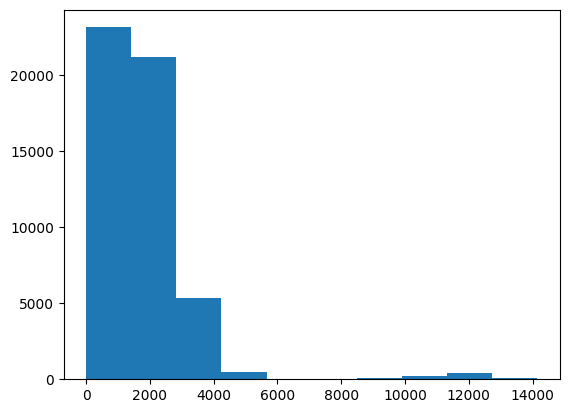

In [7]:
plt.hist(votes_df["distance"])

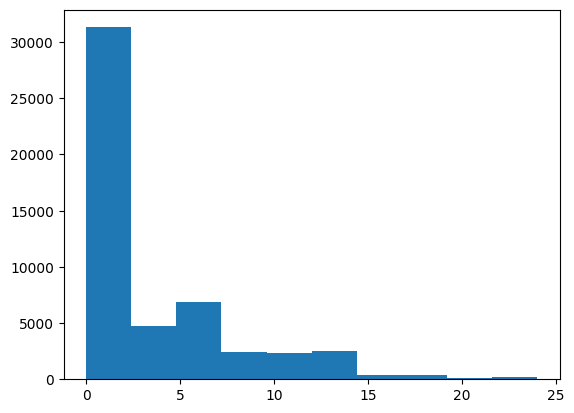

In [8]:
plt.hist(votes_df["total_points"])
plt.show()

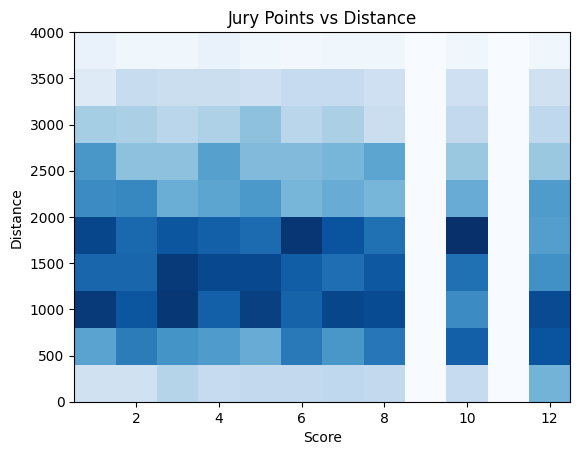

In [36]:
trunc_votes = votes_df[(votes_df["distance"] < 4000) & (votes_df["jury_points"] > 0)].dropna()
# trunc_votes = votes_df[votes_df["distance"] < 4000].dropna()

plt.hist2d(trunc_votes["jury_points"], trunc_votes["distance"], bins=(12, 10), range=[[0.5, 12.5],[0, 4000]], cmap="Blues")
plt.xlabel("Score")
plt.ylabel("Distance")
plt.title("Jury Points vs Distance")
plt.savefig("../plots/data/jury_points.png")
plt.show()


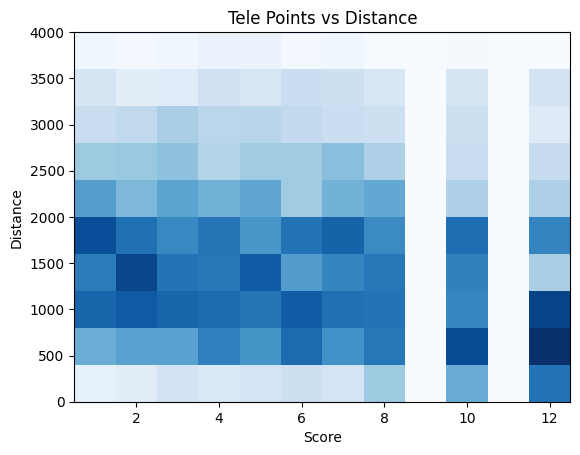

In [37]:
trunc_votes = votes_df[(votes_df["distance"] < 4000) & (votes_df["tele_points"] > 0)].dropna()
# trunc_votes = votes_df[votes_df["distance"] < 4000].dropna()

plt.hist2d(trunc_votes["tele_points"], trunc_votes["distance"], bins=(12, 10), range=[[0.5, 12.5],[0, 4000]], cmap="Blues")
plt.xlabel("Score")
plt.ylabel("Distance")
plt.title("Tele Points vs Distance")
plt.savefig("../plots/data/tele_points.png")
plt.show()

(array([[23., 20., 26., 23., 33., 31., 21., 31., 11., 41., 20., 38., 19.,
         11., 15., 20., 16., 27., 17., 20.,  0., 24., 25.],
        [69., 59., 54., 77., 60., 86., 71., 74., 38., 77., 38., 85., 29.,
         36., 19., 32., 23., 28.,  4., 20.,  0., 16., 24.],
        [95., 89., 81., 71., 93., 67., 95., 99., 38., 64., 26., 76., 29.,
         33., 34., 25., 14., 24., 14., 16.,  0., 12., 21.],
        [99., 97., 88., 87., 97., 77., 97., 75., 26., 75., 32., 52., 30.,
         38., 28., 31., 18., 24.,  6., 18.,  0.,  7.,  8.],
        [70., 84., 77., 71., 78., 91., 80., 74., 35., 82., 33., 53., 40.,
         45., 22., 22., 20., 33., 12., 20.,  0., 10., 13.],
        [67., 60., 59., 51., 61., 47., 47., 40., 18., 40., 27., 33., 21.,
         15., 18., 16., 11.,  9.,  5., 17.,  0., 11.,  3.],
        [50., 38., 47., 40., 37., 40., 56., 40., 24., 31., 16., 26., 18.,
         15., 19., 12., 14.,  7.,  5., 10.,  0., 10.,  3.],
        [26., 23., 27., 29., 26., 30., 34., 32., 13., 26., 14.

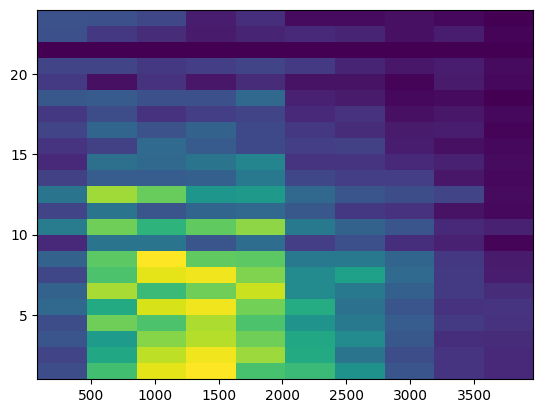

In [29]:
trunc_votes = votes_df[(votes_df["distance"] < 4000) & (votes_df["total_points"] > 0)].dropna()
# trunc_votes = votes_df[votes_df["distance"] < 4000].dropna()

plt.hist2d(trunc_votes["distance"], trunc_votes["total_points"], bins=(10, 23))
# plt.xlabel("Score")
# plt.ylabel("Distance")
# plt.title("Tele Points vs Distance")
# plt.show()

In [11]:
votes_df[(votes_df["distance"] < 500)]

,Unnamed: 0,year,round,from_country,to_country,total_points,tele_points,jury_points,from_capital,to_capital,distance
9,9,1957,final,at,at,0,NaN,NaN,Vienna,Vienna,0.000000
10,10,1957,final,be,nl,5,NaN,NaN,Brussels,Amsterdam,173.572993
11,11,1957,final,be,fr,2,NaN,NaN,Brussels,Paris,261.801329
13,13,1957,final,be,lu,0,NaN,NaN,Brussels,Luxembourg,187.140099
16,16,1957,final,be,gb,1,NaN,NaN,Brussels,London,319.693098
...,...,...,...,...,...,...,...,...,...,...,...
51281,51281,2023,final,ua,ua,0,0.0,0.0,Kyiv,Kyiv,0.000000
51293,51293,2023,final,ua,md,6,6.0,0.0,Kyiv,Chi?in?u,402.958789
51308,51308,2023,final,gb,be,13,6.0,7.0,London,Brussels,319.693098
51317,51317,2023,final,gb,fr,0,0.0,0.0,London,Paris,343.348168


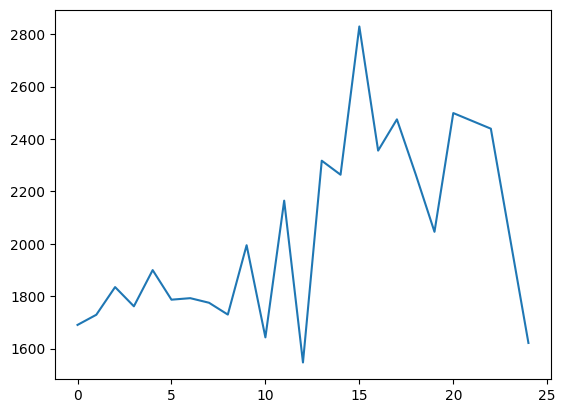

In [12]:
avg_dist = votes_df.groupby("total_points")["distance"].mean()
plt.plot(avg_dist)
plt.show()

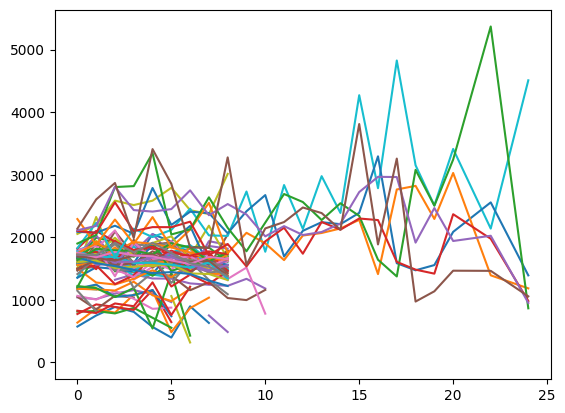

In [13]:
avg_dist = votes_df.groupby(["total_points", "year"])["distance"].mean()
avg_dist.unstack()
plt.plot(avg_dist.unstack())
# plt.show()

(array([[ 22.,  26.,  30.,  26.,  31.,  30.,  35.,  22.,   0.,  27.,  17.],
        [ 30.,  27.,  33.,  33.,  37.,  23.,  33.,  17.,   0.,  27.,  24.],
        [ 28.,  24.,  38.,  29.,  33.,  31.,  29.,  35.,   0.,  32.,  27.],
        [ 30.,  28.,  28.,  39.,  31.,  31.,  23.,  34.,   0.,  35.,  26.],
        [ 24.,  27.,  26.,  27.,  32.,  34.,  32.,  41.,   0.,  43.,  31.],
        [ 18.,  30.,  30.,  30.,  37.,  37.,  34.,  42.,   0.,  50.,  44.],
        [ 17.,  25.,  28.,  28.,  34.,  29.,  40.,  49.,   0.,  38.,  38.],
        [ 30.,  25.,  24.,  32.,  24.,  39.,  33.,  47.,   0.,  46.,  62.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 19.,  23.,  31.,  32.,  20.,  37.,  42.,  51.,   0.,  51.,  67.],
        [ 20.,  20.,  23.,  31.,  30.,  34.,  39.,  42.,   0.,  48., 109.]]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <matplotlib.collectio

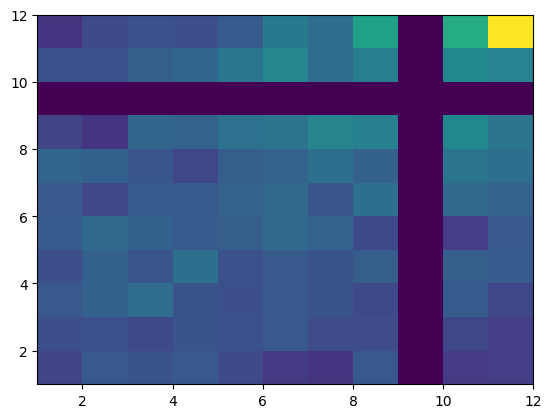

In [14]:
points_df = votes_df[["tele_points", "jury_points"]].dropna()
points_df = points_df[(points_df["jury_points"] > 0) & (points_df["tele_points"] > 0)]
plt.hist2d(points_df["tele_points"], points_df["jury_points"], bins=[11, 11])

In [15]:
points_df[points_df["tele_points"] == 10]

,tele_points,jury_points
39628,10.0,8.0
39668,10.0,8.0
39717,10.0,10.0
39743,10.0,7.0
39779,10.0,4.0
...,...,...
51016,10.0,10.0
51158,10.0,8.0
51228,10.0,8.0
51253,10.0,8.0


In [16]:
wrp_raw = pd.read_csv("../data/WRP_national.csv")
merged_countries = pd.read_csv("../data/country_data.csv")
wrp_data = merged_countries.merge(wrp_raw, left_on='iso-alpha-3', right_on="name")
wrp_raw['name'].unique()


array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'DMA', 'GRN', 'SLU', 'SVG', 'AAB', 'SKN', 'MEX', 'BLZ', 'GUA',
       'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL', 'VEN', 'GUY', 'SUR',
       'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL', 'ARG', 'URU', 'UKG',
       'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'MNC', 'LIE', 'SWZ', 'SPN',
       'AND', 'POR', 'GMY', 'GFR', 'GDR', 'POL', 'AUS', 'HUN', 'CZE',
       'CZR', 'SLO', 'ITA', 'SNM', 'MLT', 'ALB', 'MNG', 'MAC', 'CRO',
       'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL', 'MLD', 'ROM',
       'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM', 'GRG', 'AZE',
       'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'STP', 'GNB', 'EQG',
       'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI', 'BFO',
       'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN', 'CHA',
       'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'BUI', 'RWA', 'SOM', 'DJI',
       'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW', 'SAF', 'NAM',
       'LES', 'BOT',

In [17]:
wrp_clean = wrp_data[['year', 'name_y', 'chrstprotpct', 'chrstcatpct',
       'chrstorthpct', 'chrstangpct', 'chrstothrpct', 'chrstgenpct',
       'judorthpct', 'judconspct', 'judrefpct', 'judothrpct', 'judgenpct',
       'islmsunpct', 'islmshipct', 'islmibdpct', 'islmnatpct', 'islmalwpct',
       'islmahmpct', 'islmothrpct', 'islmgenpct', 'budmahpct', 'budthrpct',
       'budothrpct', 'budgenpct', 'zorogenpct', 'hindgenpct', 'sikhgenpct',
       'shntgenpct', 'bahgenpct', 'taogenpct', 'jaingenpct', 'confgenpct',
       'syncgenpct', 'anmgenpct', 'nonreligpct', 'othrgenpct']]
# wrp_clean = wrp_data.drop(['Unnamed: 0', 'name_x', 'capital', 'state', 'iso-alpha-2', 'iso-alpha-3', 'dualrelig', 'datatype', 'sourcereliab', 'recreliab', 'reliabilevel', 'Version', 'sourcecode'], axis=1)

In [18]:
wrp_clean = wrp_clean.groupby('name_y').mean().drop('year', axis=1)

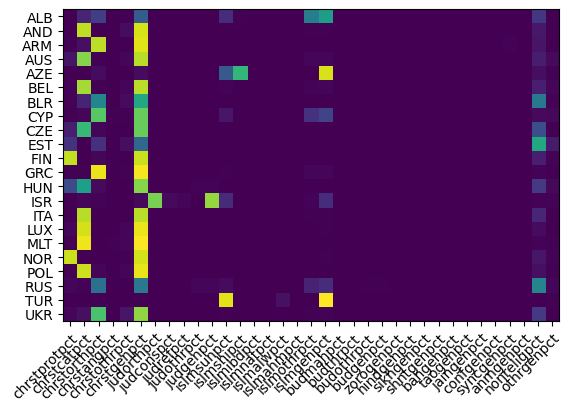

In [19]:
fig, ax = plt.subplots()
ax.imshow(wrp_clean)
ax.set_xticks(range(len(wrp_clean.columns)), labels=wrp_clean.columns,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(wrp_clean.index)), labels=wrp_clean.index)
plt.show()

## Vizualisation for GDP Data as a Histogram

In [20]:
import seaborn as sns
# Load the data

votes = pd.read_csv("../data/fulldata.csv")
votes[votes["from_country"] != votes["to_country"]]
print(votes.columns)


votes.replace("..",float("nan"),inplace=True)
votes["GDP per capita (current US$)_from"] = pd.to_numeric(votes["GDP per capita (current US$)_from"], errors='coerce')
votes = votes.dropna(subset=["GDP per capita (current US$)_from"])



plt.figure(figsize=(8, 5))
sns.histplot(
        votes["GDP per capita (current US$)_from"],
        bins=40,
        color="blue",
        alpha=0.5,
        label=f"GDP per capita",
        kde=True,
    )

plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Frequency")
plt.title("GDP per capita Distribution over the whole dataset")

plt.grid(True)
plt.savefig("../plots/data/gdp.png")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

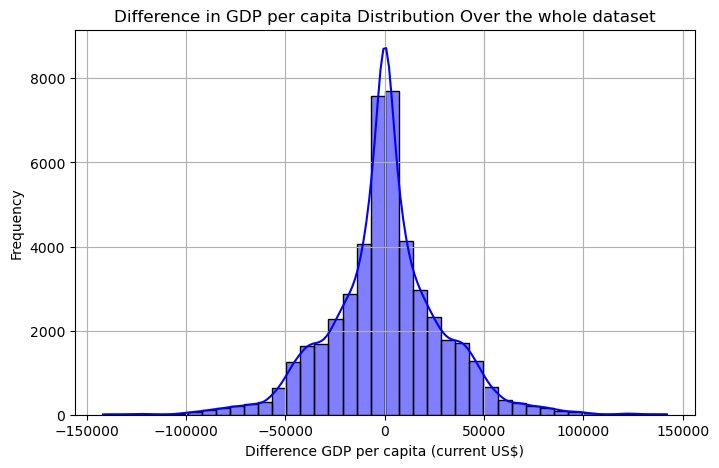

In [ ]:
votes["GDP per capita (current US$)_to"] = pd.to_numeric(votes["GDP per capita (current US$)_to"], errors='coerce')
votes = votes.dropna(subset=["GDP per capita (current US$)_to"])


votes["GDP_Difference"] = votes["GDP per capita (current US$)_from"] - votes["GDP per capita (current US$)_to"]

plt.figure(figsize=(8, 5))
sns.histplot(
        votes["GDP_Difference"],
        bins=40,
        color="blue",
        alpha=0.5,
        label=f" Difference GDP per capita",
        kde=True,
    )

plt.xlabel("Difference GDP per capita (current US$)")
plt.ylabel("Frequency")
plt.title("Difference in GDP per capita Distribution over the whole dataset")

plt.grid(True)
plt.savefig("../plots/data/gdp_difference.png")
plt.show()